In [124]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [125]:
df = pd.read_csv('insurance_claims.csv')

In [126]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [127]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [128]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [130]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

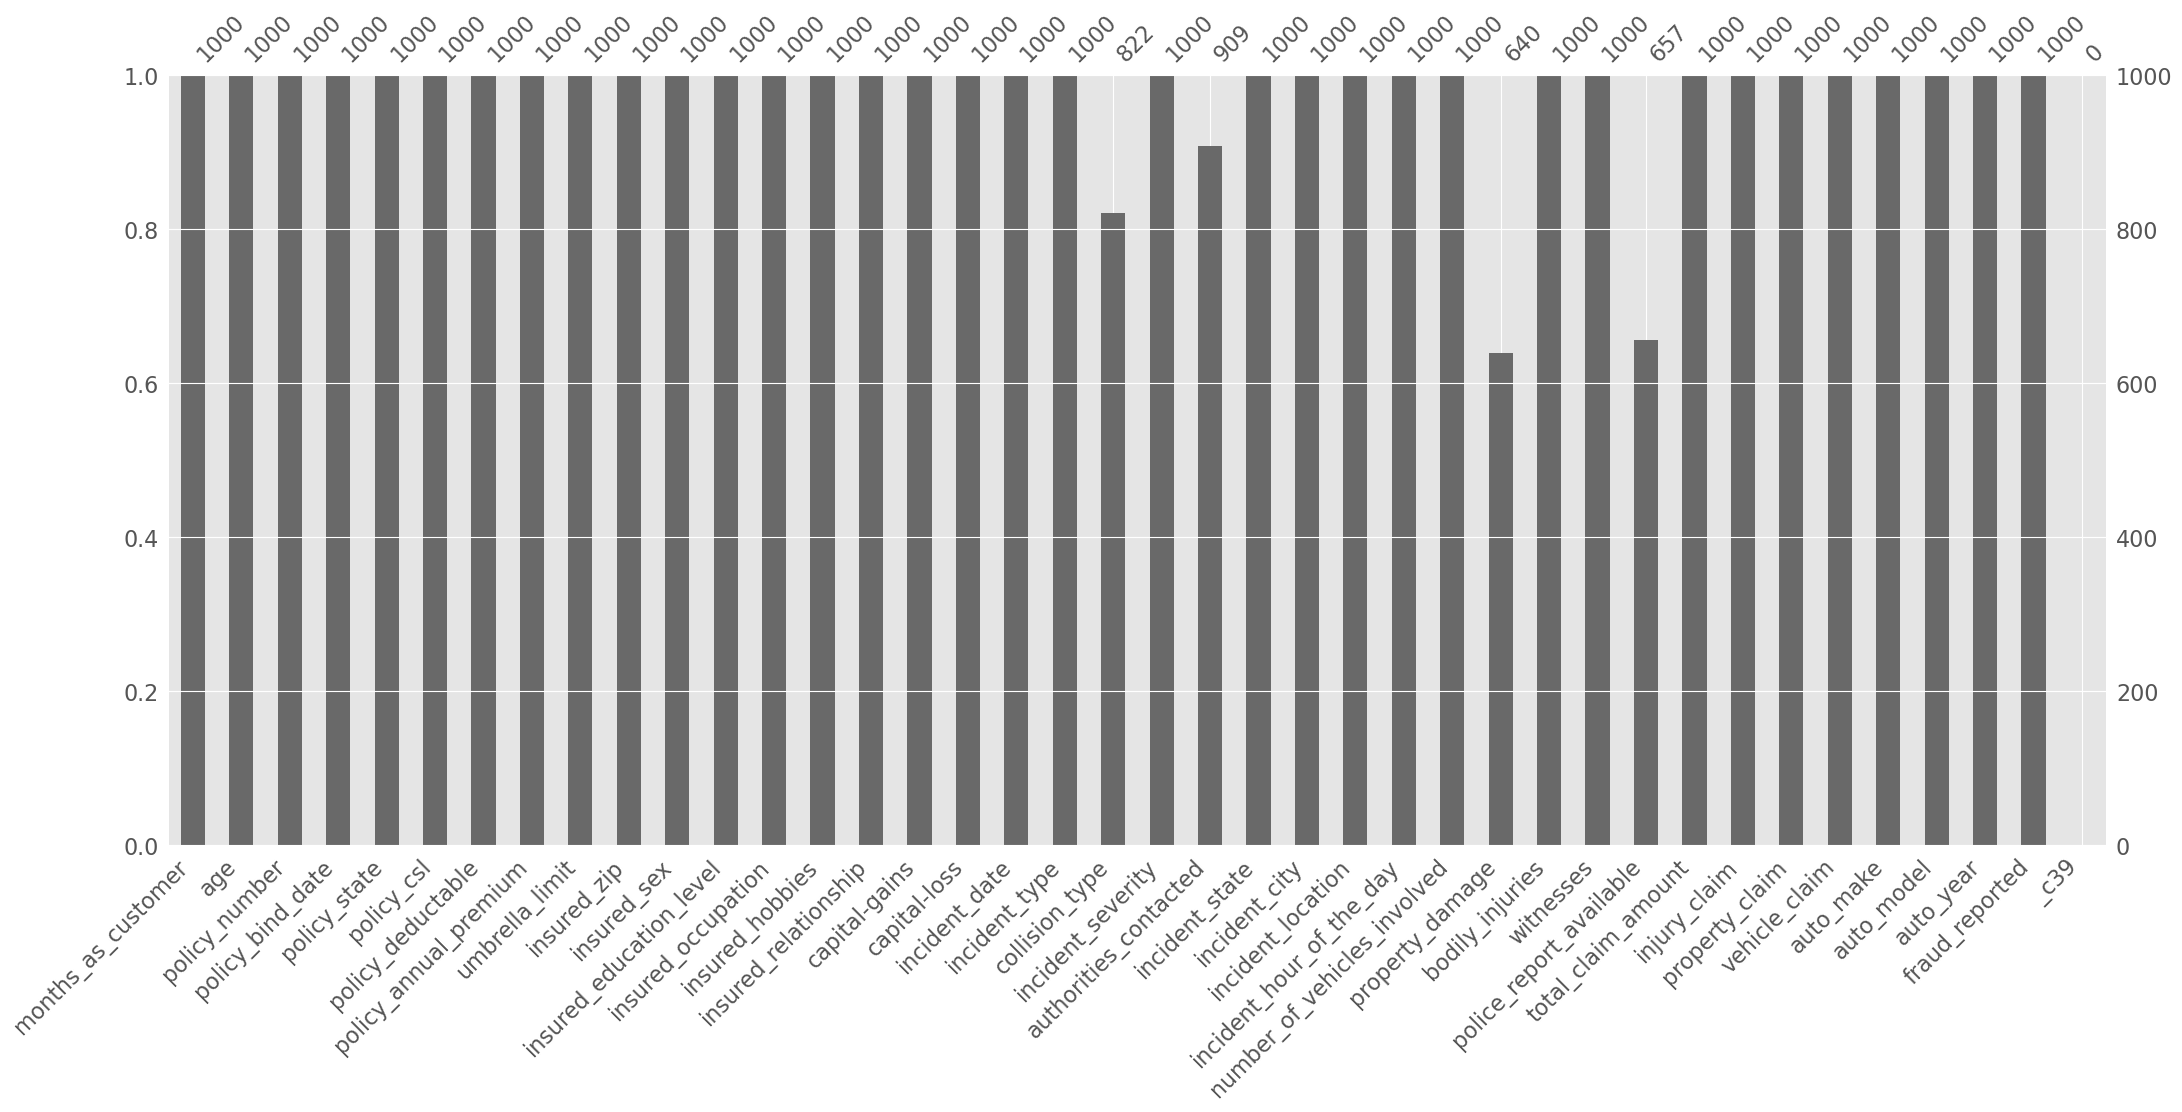

In [131]:
import missingno as msno

msno.bar(df)
plt.show()

In [132]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [133]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [134]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [135]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [136]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [137]:
missing_values = df.isna().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

In [138]:
#Print the columns with nulls
print(columns_with_missing_values) 

_c39    1000
dtype: int64


In [139]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

In [140]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


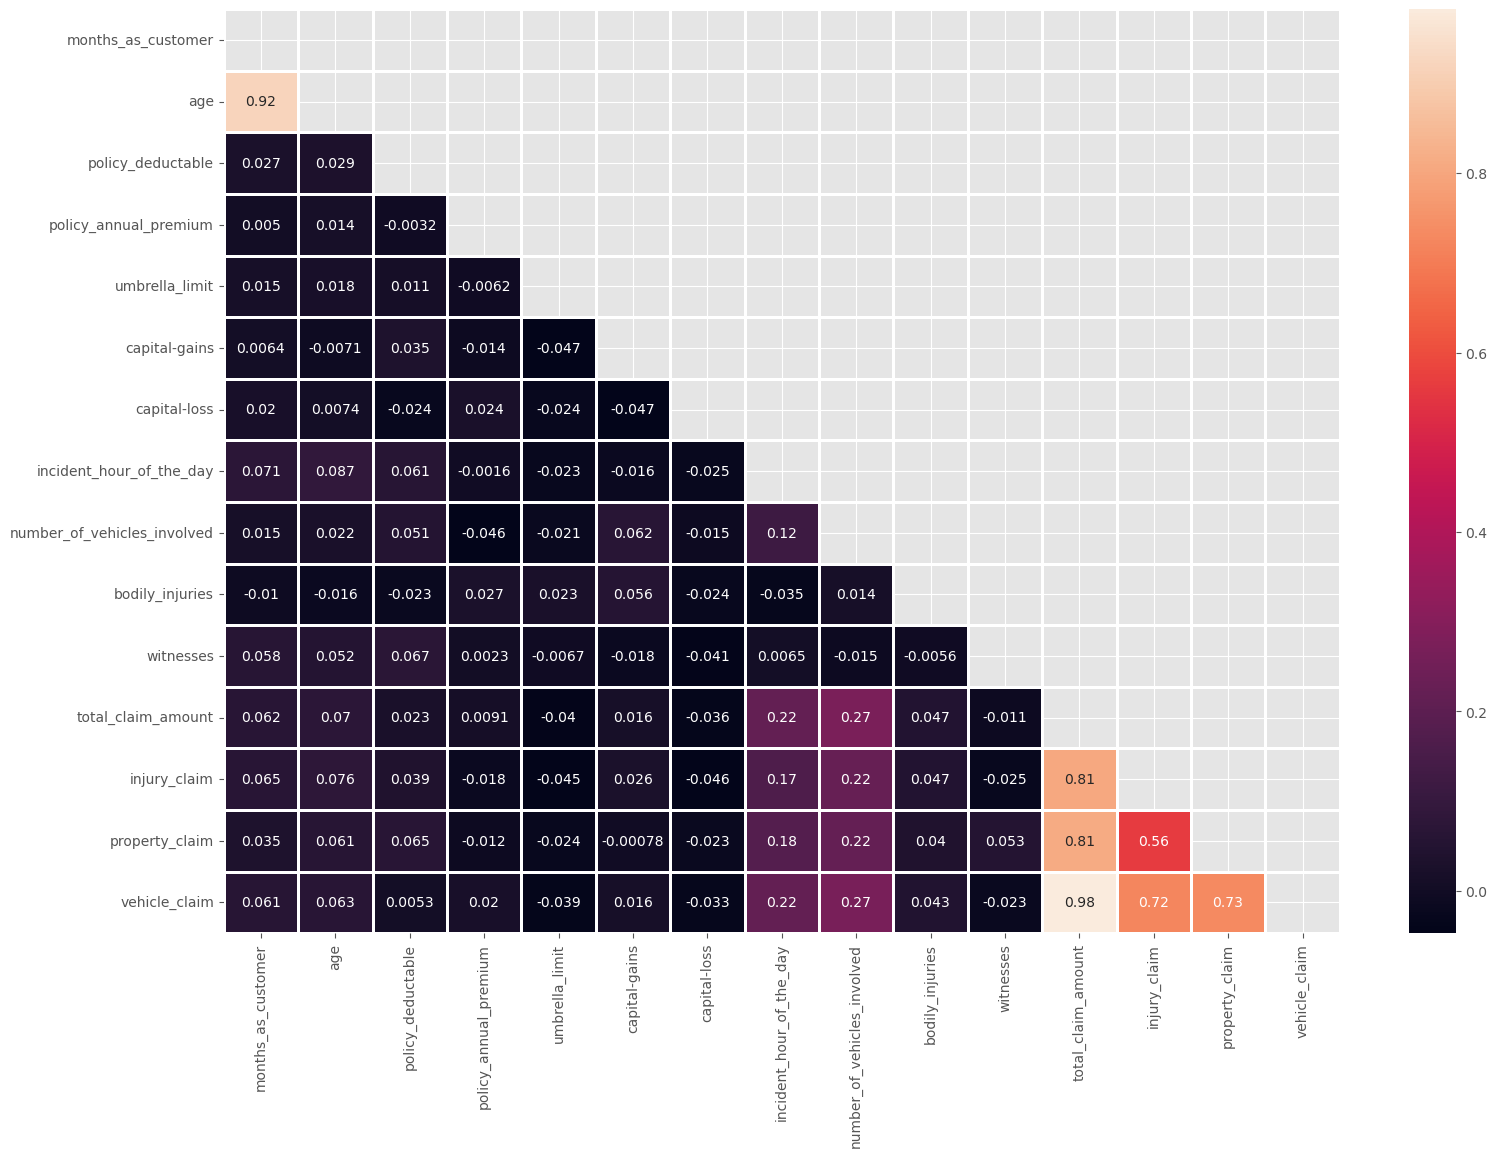

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# checking for multicollinearity
plt.figure(figsize = (18, 12))

# select only the numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [142]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [143]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [145]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [146]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])


In [147]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO


In [148]:
import category_encoders as ce

# Create an instance of BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'property_damage', 'police_report_available'])

# Fit and transform the data
cat_df_binary_encoded = binary_encoder.fit_transform(cat_df)

# Display the encoded DataFrame
print(cat_df_binary_encoded.head())


   policy_csl_0  policy_csl_1  insured_sex_0  insured_sex_1  \
0             0             1              0              1   
1             0             1              0              1   
2             1             0              1              0   
3             0             1              1              0   
4             1             1              0              1   

   insured_education_level_0  insured_education_level_1  \
0                          0                          0   
1                          0                          0   
2                          0                          1   
3                          0                          1   
4                          0                          1   

   insured_education_level_2  insured_occupation_0  insured_occupation_1  \
0                          1                     0                     0   
1                          1                     0                     0   
2                          0          

In [149]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [150]:
num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [151]:
X = pd.concat([num_df, cat_df_binary_encoded], axis = 1)

In [152]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,property_damage_0,property_damage_1,police_report_available_0,police_report_available_1
0,328,1000,0,53300,0,5,1,1,2,6510,...,0,0,1,0,0,1,0,1,0,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,1,1,0,1,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,1,1,0,1,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,1,0,0,1,1,0,1,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,1,0,1,0


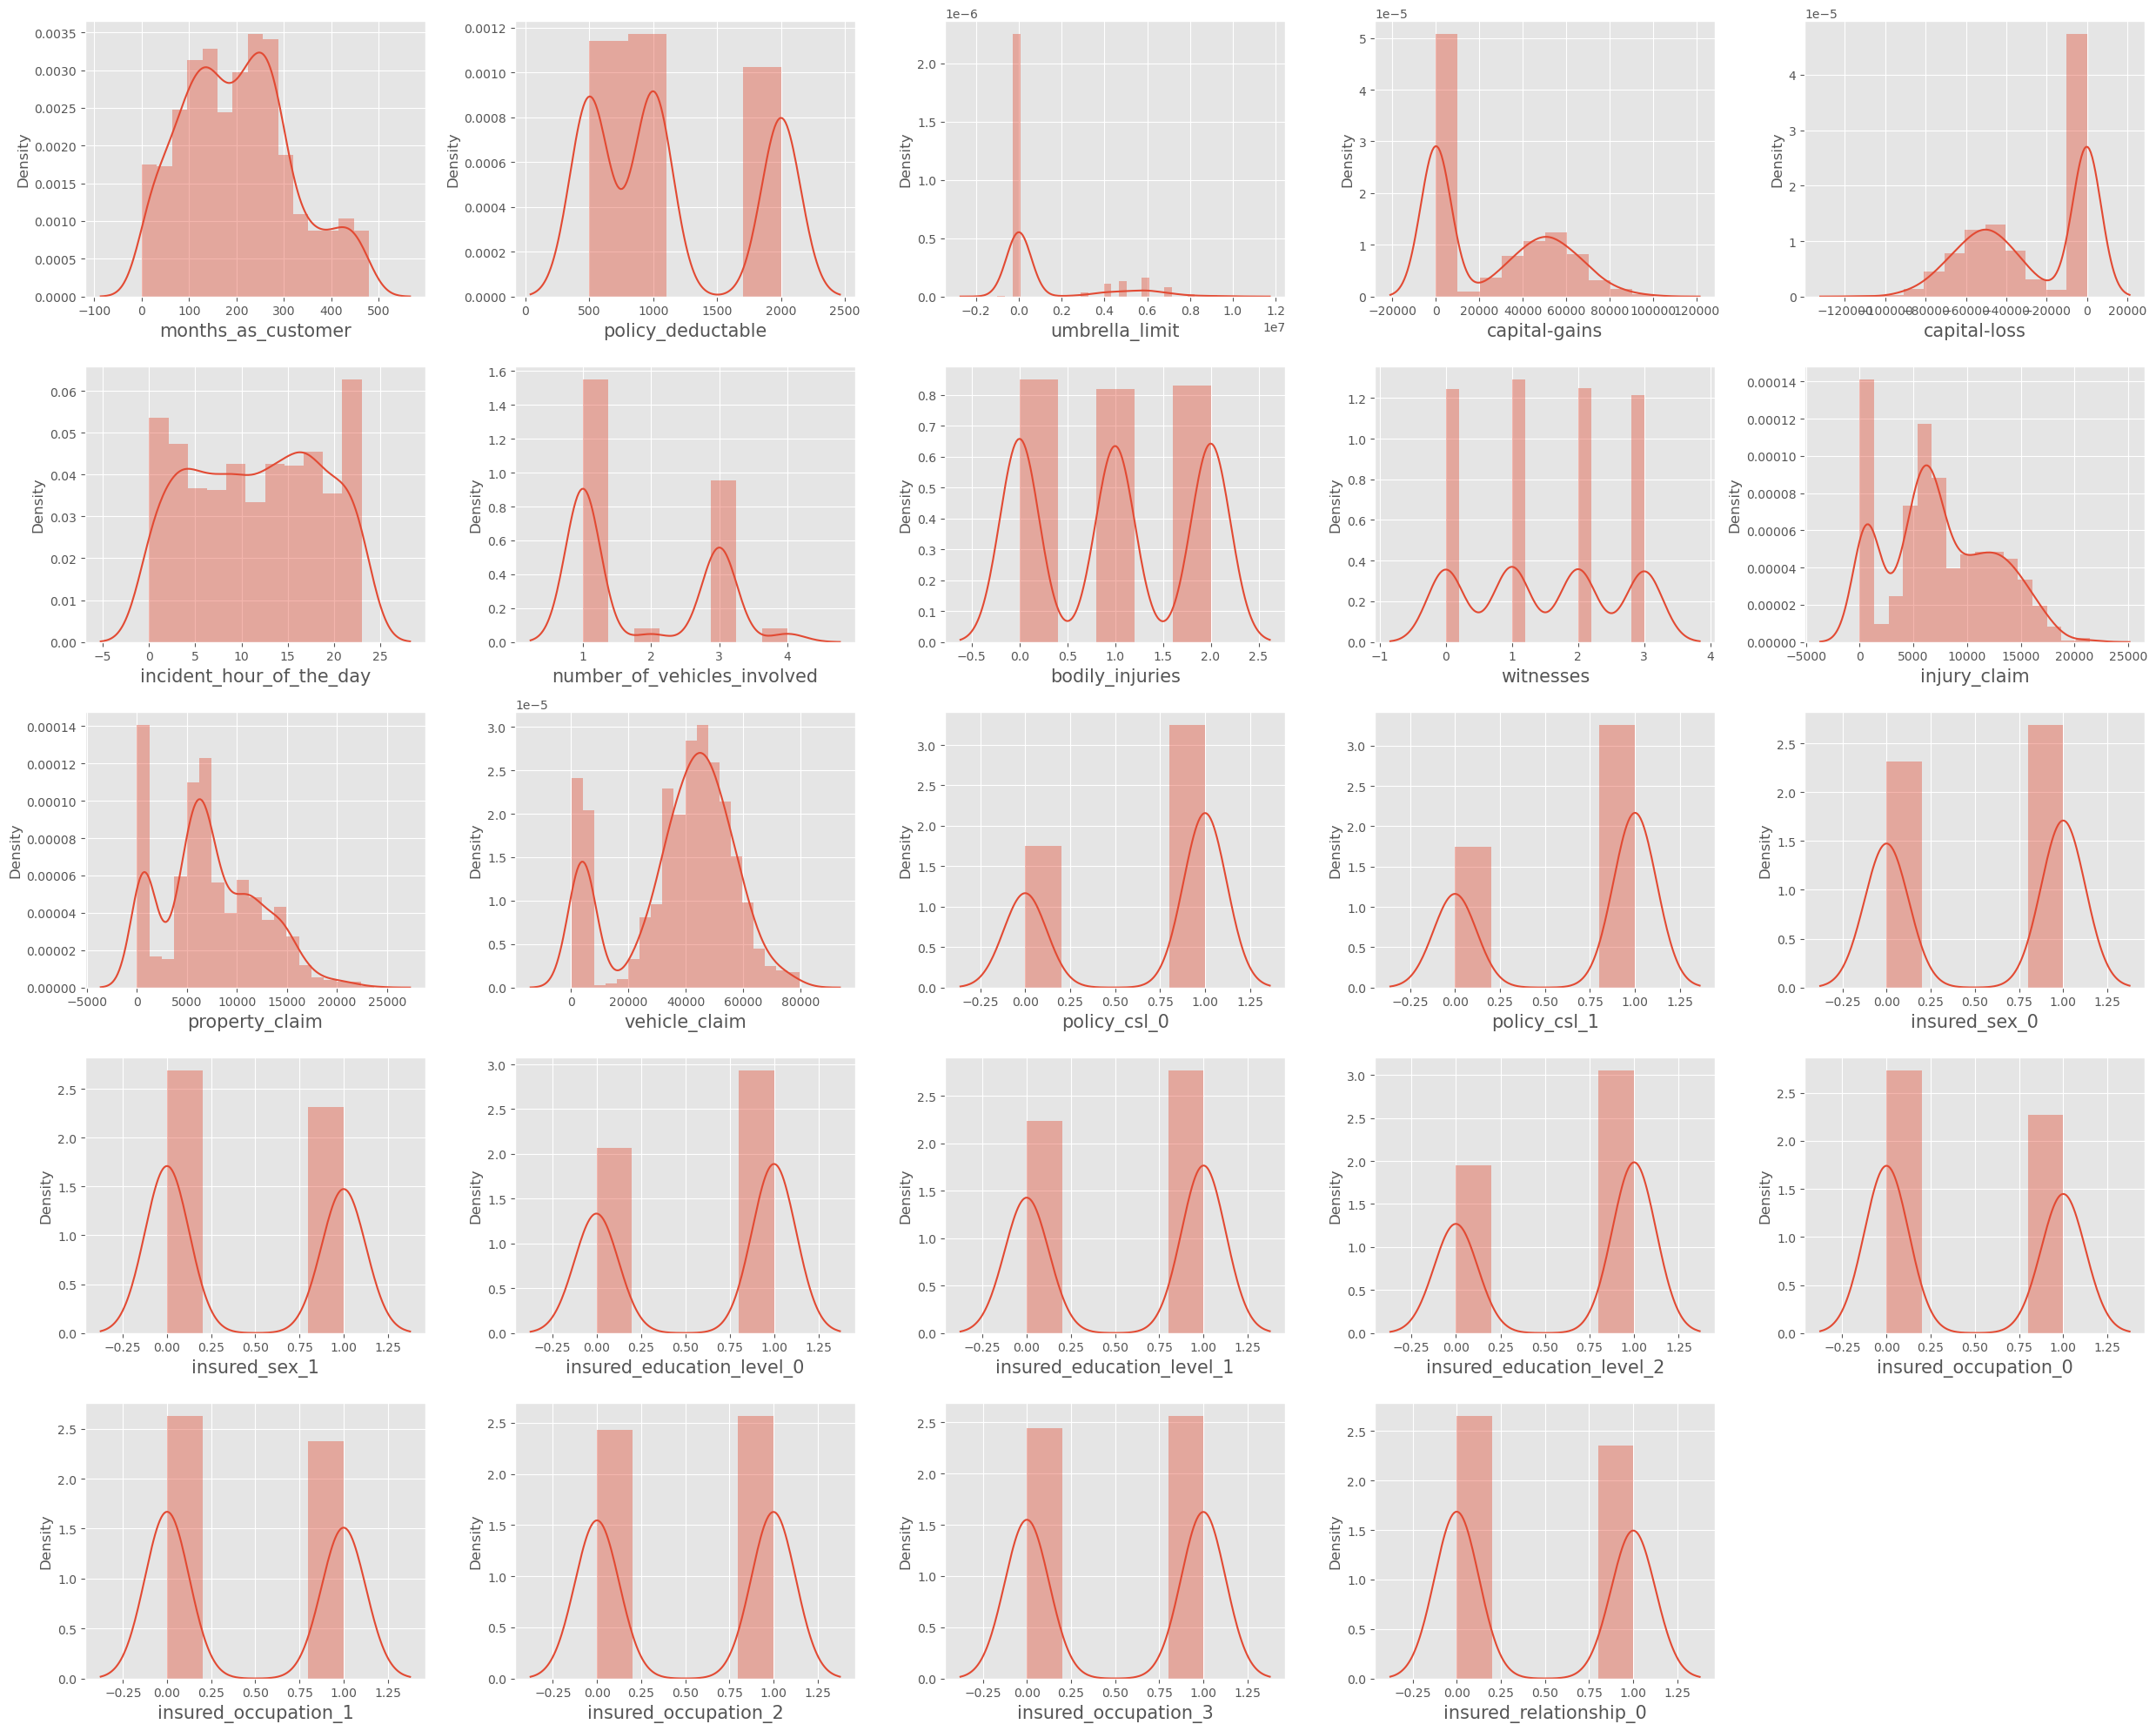

In [153]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

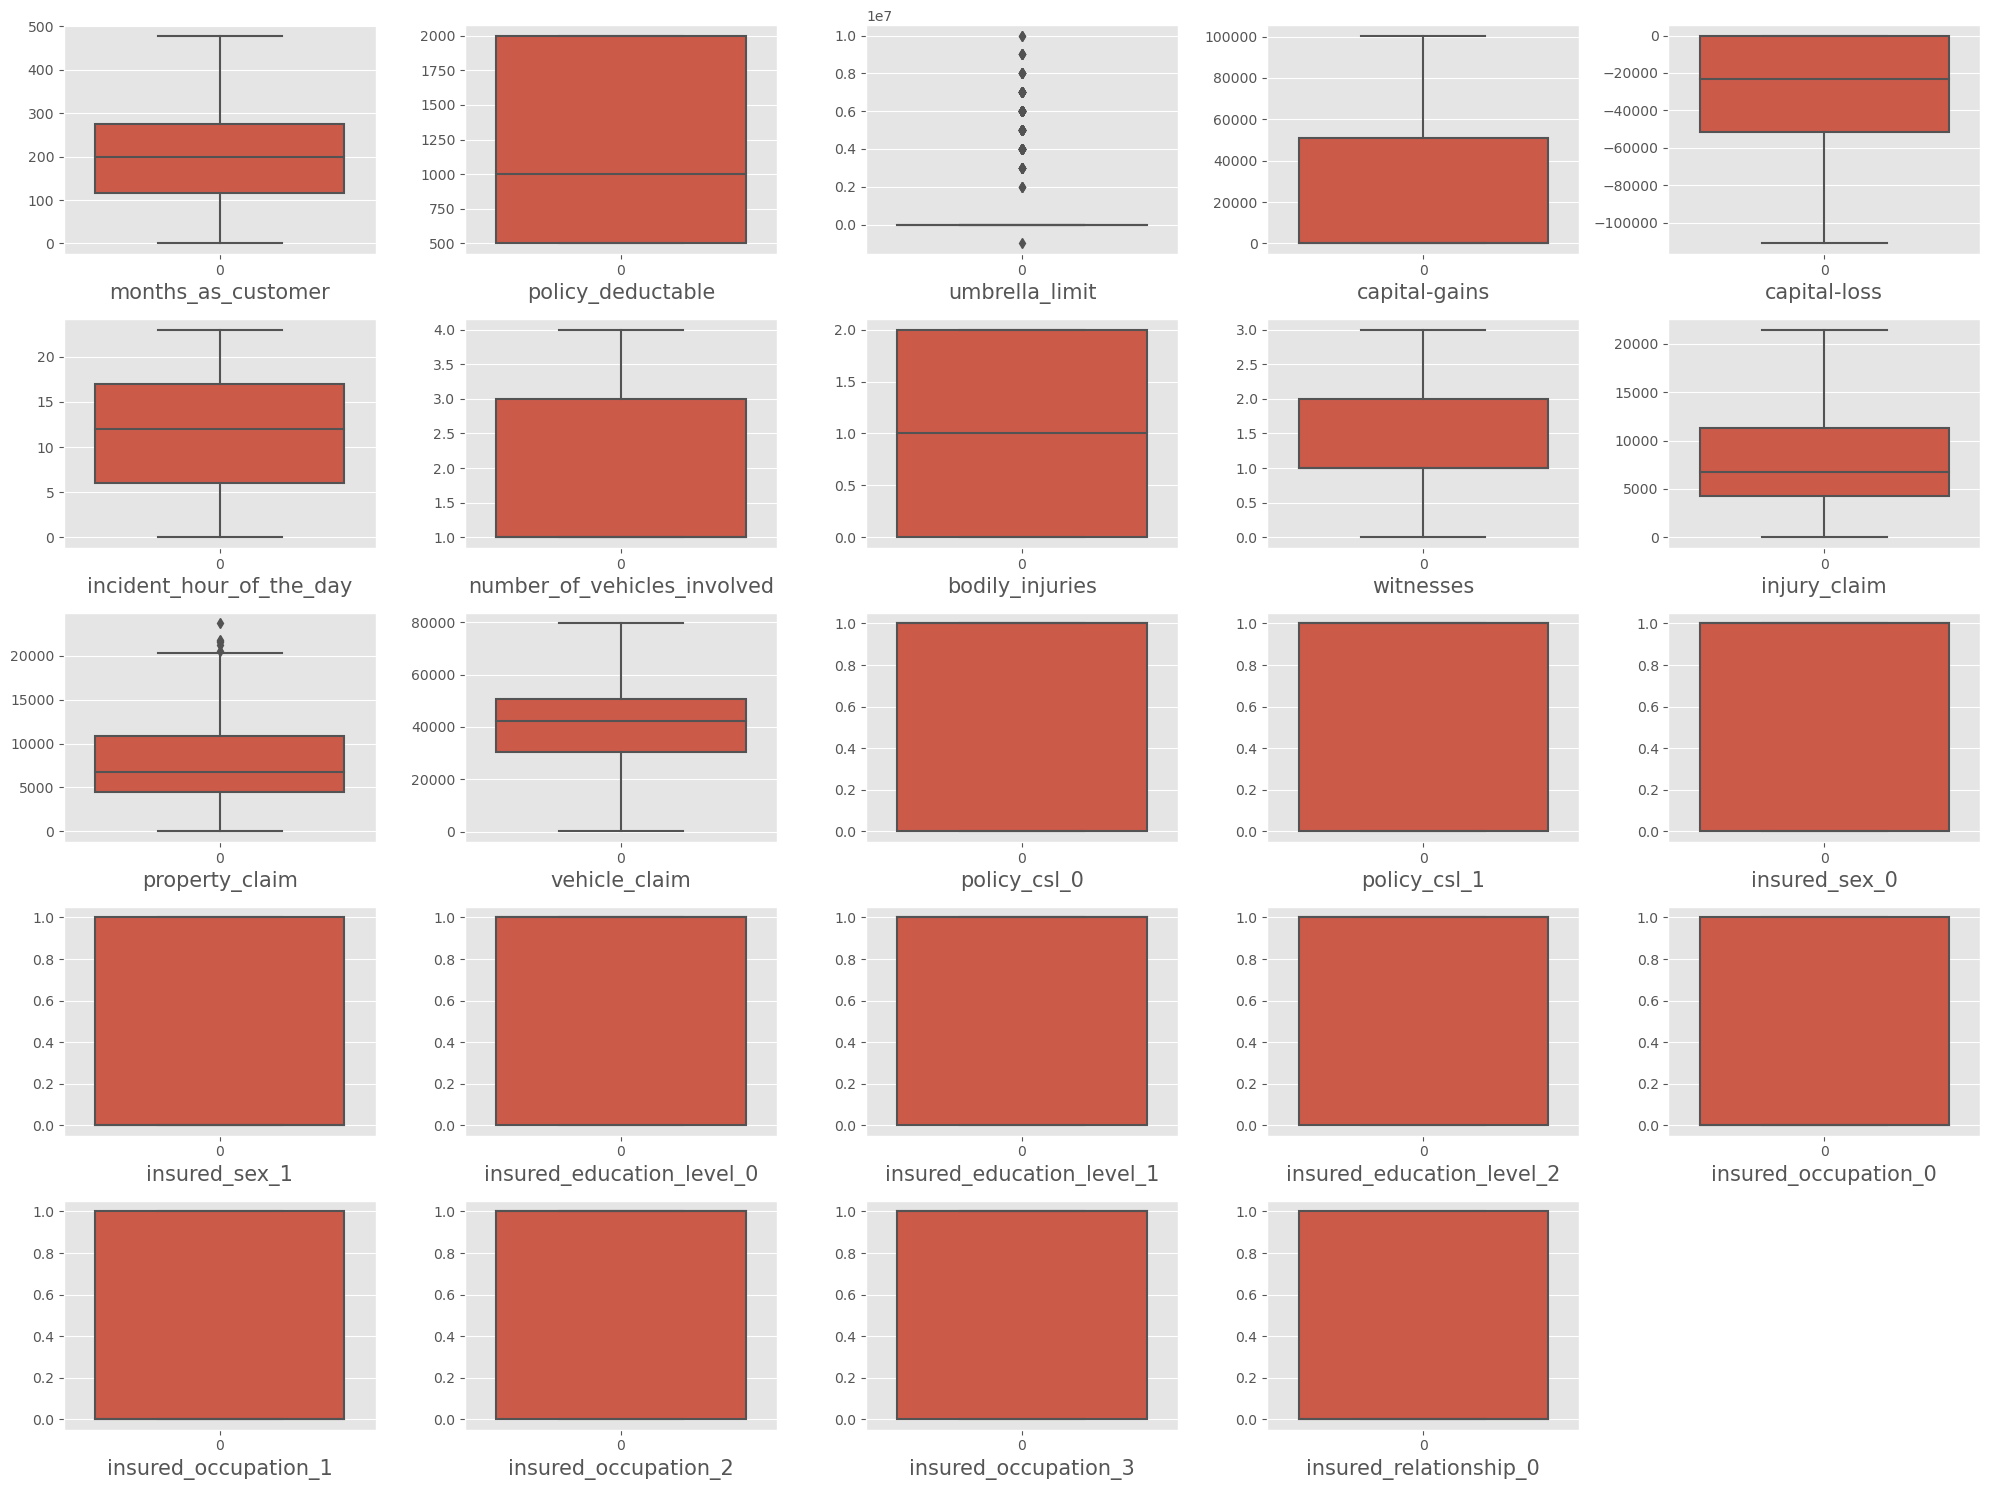

In [154]:
#outliers Detection
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [155]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [156]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,property_damage_0,property_damage_1,police_report_available_0,police_report_available_1
918,180,500,0,0,0,7,3,2,1,12660,...,0,1,0,1,0,0,0,1,1,0
604,75,1000,0,0,0,15,2,0,1,5970,...,0,1,0,0,0,1,1,0,0,1
692,137,500,0,48500,-67400,4,1,1,1,1200,...,0,1,0,0,0,1,0,1,1,0
736,339,500,0,0,0,18,3,2,1,8640,...,0,1,1,0,1,0,1,0,1,0
261,156,2000,0,0,0,3,1,2,0,5900,...,0,0,1,0,0,1,1,0,1,0


In [157]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [159]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [158]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
918,-0.224112,1.401643,-0.475599,1.184971,-0.794583,0.048738,2.140110,1.255914,1.361434,0.800134,-0.323561,0.143550
604,0.424692,-1.044980,-0.475599,-0.890012,0.952375,-0.240220,-0.814030,-1.206662,-0.431499,-1.511675,-0.399128,0.010541
692,-0.417000,1.401643,-0.475599,-0.890012,-0.423800,-1.685008,-0.814030,-1.206662,-1.327966,-0.810519,-0.065374,-0.695147
736,0.450995,1.401643,-0.475599,-0.890012,-0.088669,-1.107093,-0.814030,0.024626,1.361434,-1.183133,-1.362606,-1.642045
261,0.109057,-1.044980,-0.475599,0.463549,-1.646670,0.337695,1.155397,1.255914,-1.327966,1.569402,0.079463,1.258821


In [160]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [161]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [162]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_0,incident_severity_1,incident_severity_2,authorities_contacted_0,authorities_contacted_1,authorities_contacted_2,property_damage_0,property_damage_1,police_report_available_0,police_report_available_1
918,-0.224112,1.401643,-0.475599,1.184971,-0.794583,0.048738,2.140110,1.255914,1.361434,0.800134,...,0,1,0,1,0,0,0,1,1,0
604,0.424692,-1.044980,-0.475599,-0.890012,0.952375,-0.240220,-0.814030,-1.206662,-0.431499,-1.511675,...,0,1,0,0,0,1,1,0,0,1
692,-0.417000,1.401643,-0.475599,-0.890012,-0.423800,-1.685008,-0.814030,-1.206662,-1.327966,-0.810519,...,0,1,0,0,0,1,0,1,1,0
736,0.450995,1.401643,-0.475599,-0.890012,-0.088669,-1.107093,-0.814030,0.024626,1.361434,-1.183133,...,0,1,1,0,1,0,1,0,1,0
261,0.109057,-1.044980,-0.475599,0.463549,-1.646670,0.337695,1.155397,1.255914,-1.327966,1.569402,...,0,0,1,0,0,1,1,0,1,0


### Decison Tree Classifier

In [163]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [164]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.504
[[113  81]
 [ 43  13]]
              precision    recall  f1-score   support

           N       0.72      0.58      0.65       194
           Y       0.14      0.23      0.17        56

    accuracy                           0.50       250
   macro avg       0.43      0.41      0.41       250
weighted avg       0.59      0.50      0.54       250



In [165]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [166]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7973333333333332


In [167]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [168]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8066666666666666
Test accuracy of Decision Tree is : 0.824
[[168  26]
 [ 18  38]]
              precision    recall  f1-score   support

           N       0.90      0.87      0.88       194
           Y       0.59      0.68      0.63        56

    accuracy                           0.82       250
   macro avg       0.75      0.77      0.76       250
weighted avg       0.83      0.82      0.83       250



In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the grid of hyperparameters to search
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(dtc, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model for prediction
best_dtc = grid_search.best_estimator_
y_pred_train = best_dtc.predict(X_train)
y_pred_test = best_dtc.predict(X_test)

# Evaluate the best model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7946666666666667
Training Accuracy: 0.8106666666666666
Test Accuracy: 0.824
Confusion Matrix:
[[168  26]
 [ 18  38]]
Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.87      0.88       194
           Y       0.59      0.68      0.63        56

    accuracy                           0.82       250
   macro avg       0.75      0.77      0.76       250
weighted avg       0.83      0.82      0.83       250



In [170]:
# Convert target variable to binary labels
y_train_binary = (y_train == 'Y').astype(int)
y_test_binary = (y_test == 'Y').astype(int)

# Perform grid search cross-validation
grid_search = GridSearchCV(xgb_clf, grid_params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train_binary)  # Use binary labels

# Use the best model for prediction
best_xgb = grid_search.best_estimator_
y_pred_train = best_xgb.predict(X_train)
y_pred_test = best_xgb.predict(X_test)

# Evaluate the best model
train_accuracy = accuracy_score(y_train_binary, y_pred_train)
test_accuracy = accuracy_score(y_test_binary, y_pred_test)
print("Training Accuracy:", train_accuracy) 

print("Test Accuracy:", test_accuracy)

print("Confusion Matrix:")
print(confusion_matrix(y_test_binary, y_pred_test))
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_test))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Training Accuracy: 1.0
Test Accuracy: 0.796
Confusion Matrix:
[[170  24]
 [ 27  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       194
           1       0.55      0.52      0.53        56

    accuracy                           0.80       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.79      0.80      0.79       250

